## Problem ##

### Build the Logistic Regression model to predict whether a user will purchase the product or not. ###

In [162]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Seaborn visualization library
import seaborn as sns


In [163]:
dataset=pd.read_csv("user_data.csv")

In [164]:
dataset.shape

(400, 5)

In [165]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


## Data Cleaning ##

In [166]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [167]:
dataset.drop("User ID",axis=1,inplace=True)

In [168]:
dataset

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


## Data Transformation ##

In [169]:
dataset['Gender'].replace(to_replace=['Male','Female'],
                         value=['0','1'],
                         inplace=True)

In [170]:
dataset.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Logistic Regression ##

In [171]:
X = dataset.iloc[:, 1:2]
Y = dataset.iloc[:,-1]

In [172]:
X.head()

,Age
0,19
1,35
2,26
3,27
4,19


In [173]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [174]:
dataset

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
5,0,27,58000,0
6,1,27,84000,0
7,1,32,150000,1
8,0,25,33000,0
9,1,35,65000,0


## Splitting Training and Test Set

In [175]:
from sklearn.model_selection import train_test_split

#Split the dataset into 50% train and 50% test 
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.5,random_state=42)


Now, it is very important to perform feature scaling here because Age and Estimated Salary values lie in different ranges. If we don’t scale the features then Estimated Salary feature will dominate Age feature when the model finds the nearest neighbor to a data point in data space

## Feature Scaling

In [176]:
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
X_train = sc_x.fit_transform(X_train)  
X_test = sc_x.transform(X_test) 

In [177]:
print (X_train[0:10, :])

[[-0.44674161]
 [ 0.33444591]
 [ 1.40857874]
 [ 1.40857874]
 [-0.05614785]
 [-1.13028069]
 [-1.13028069]
 [-1.13028069]
 [ 0.33444591]
 [-0.64203849]]


Here once see that Age and Estimated salary features values are sacled and now there in the -1 to 1. Hence, each feature will contribute equally in decision making

## Model Build ##

In [178]:
from sklearn.linear_model import LogisticRegression

In [179]:
logclassifier=LogisticRegression()

In [180]:
logclassifier.fit(X_train,y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [181]:
y_predict=logclassifier.predict(X_test)

In [182]:
y_predict=y_predict.round()

## Plotting the classification ##

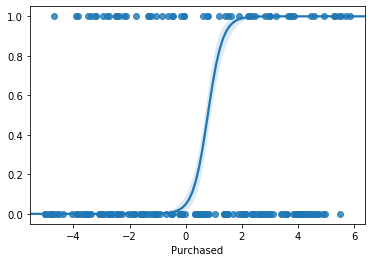

In [183]:
sns.regplot(y_test,y_predict,logistic=True,x_jitter=5);

## Model Evaluation##

In [184]:
from sklearn.metrics import confusion_matrix 

## Confusion matrix ##

In [185]:
cm = confusion_matrix(y_test, y_predict) 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[119   6]
 [ 23  52]]


## Accuray ##

In [186]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_predict)) 

Accuracy :  0.855


In [187]:
lst=list(zip(y_test,y_predict.astype(int)))
pd.DataFrame(lst,columns=['Actual','Predicted'])

,Actual,Predicted
0,0,1
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


## ROC Curve ##

0.8817066666666666


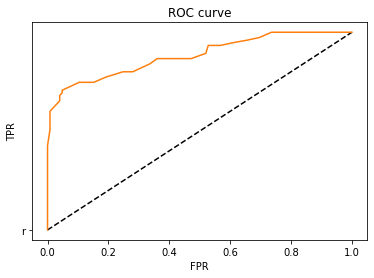

In [208]:
from sklearn.metrics import roc_curve, roc_auc_score
predictions = logclassifier.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test, predictions))

fpr, tpr, thersholds = roc_curve(y_test, predictions)

plt.plot([0,1],[0,1],'k--','r')
plt.plot(fpr, tpr)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## Multi Logistic regression

In [209]:
X = dataset.iloc[:, 1:3]
Y = dataset.iloc[:,-1]

In [210]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [211]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

## Splitting Train and Test data ##

In [212]:
from sklearn.model_selection import train_test_split

#Split the dataset into 50% train and 50% test 
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.5,random_state=7)

## Feature Scaling ##

In [213]:
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
X_train = sc_x.fit_transform(X_train)  
X_test = sc_x.transform(X_test) 

In [214]:
print (X_train[0:10, :])

[[ 0.70271644  0.29794937]
 [ 1.54150263  0.03646284]
 [-0.22926823 -0.6317805 ]
 [-0.69526056 -1.50340226]
 [-0.69526056  0.58848996]
 [-0.50886363  2.36078753]
 [ 0.98231183 -0.98042921]
 [ 1.16870877  0.5594359 ]
 [-0.04287129  1.98308477]
 [-0.60206209 -1.00948327]]


## Model Build ##

In [215]:
mclassifier=LogisticRegression()

In [216]:
mclassifier.fit(X_train,y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [217]:
y_predict=mclassifier.predict(X_test)

In [218]:
y_predict=y_predict.round()

## Plotting the predictions ##

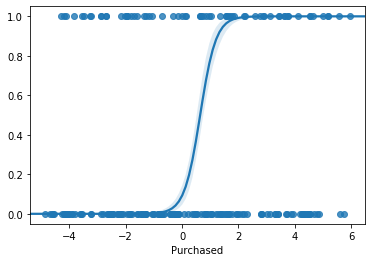

In [219]:
sns.regplot(y_test,y_predict,logistic=True,x_jitter=5);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


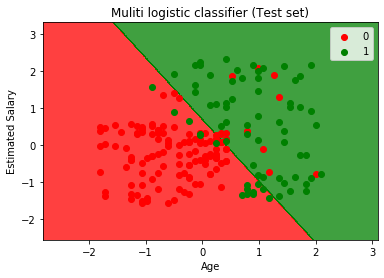

In [220]:
from matplotlib.colors import ListedColormap 
X_set, y_set = X_test, y_test 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,  
                               stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1,  
                               stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, mclassifier.predict( 
             np.array([X1.ravel(), X2.ravel()]).T).reshape( 
             X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green'))(i), label = j) 
      
plt.title('Muliti logistic classifier (Test set)') 
plt.xlabel('Age') 
plt.ylabel('Estimated Salary') 
plt.legend() 
plt.show() 


# Model Evaluation #

## Confusion Matrix ##

In [221]:
cm = confusion_matrix(y_test, y_predict) 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[119  12]
 [ 15  54]]


## Accuracy ##

In [222]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_predict)) 

Accuracy :  0.865


In [223]:
lst=list(zip(y_test,y_predict.astype(int)))
pd.DataFrame(lst,columns=['Actual','Predicted'])

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
5,1,0
6,1,1
7,0,0
8,1,1
9,0,0


## ROC ##

0.9213408562894126


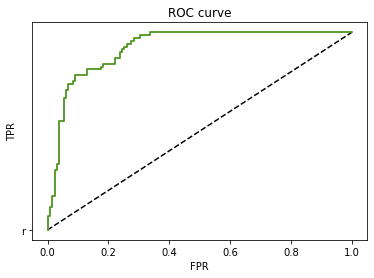

In [230]:

predictions = mclassifier.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test, predictions))

mfpr, mtpr, thersholds = roc_curve(y_test, predictions)

plt.plot([0,1],[0,1],'k--','r')
plt.plot(mfpr, mtpr)

plt.plot(fpr, tpr)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## Decision Tree ##

In [231]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(min_samples_split=8)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

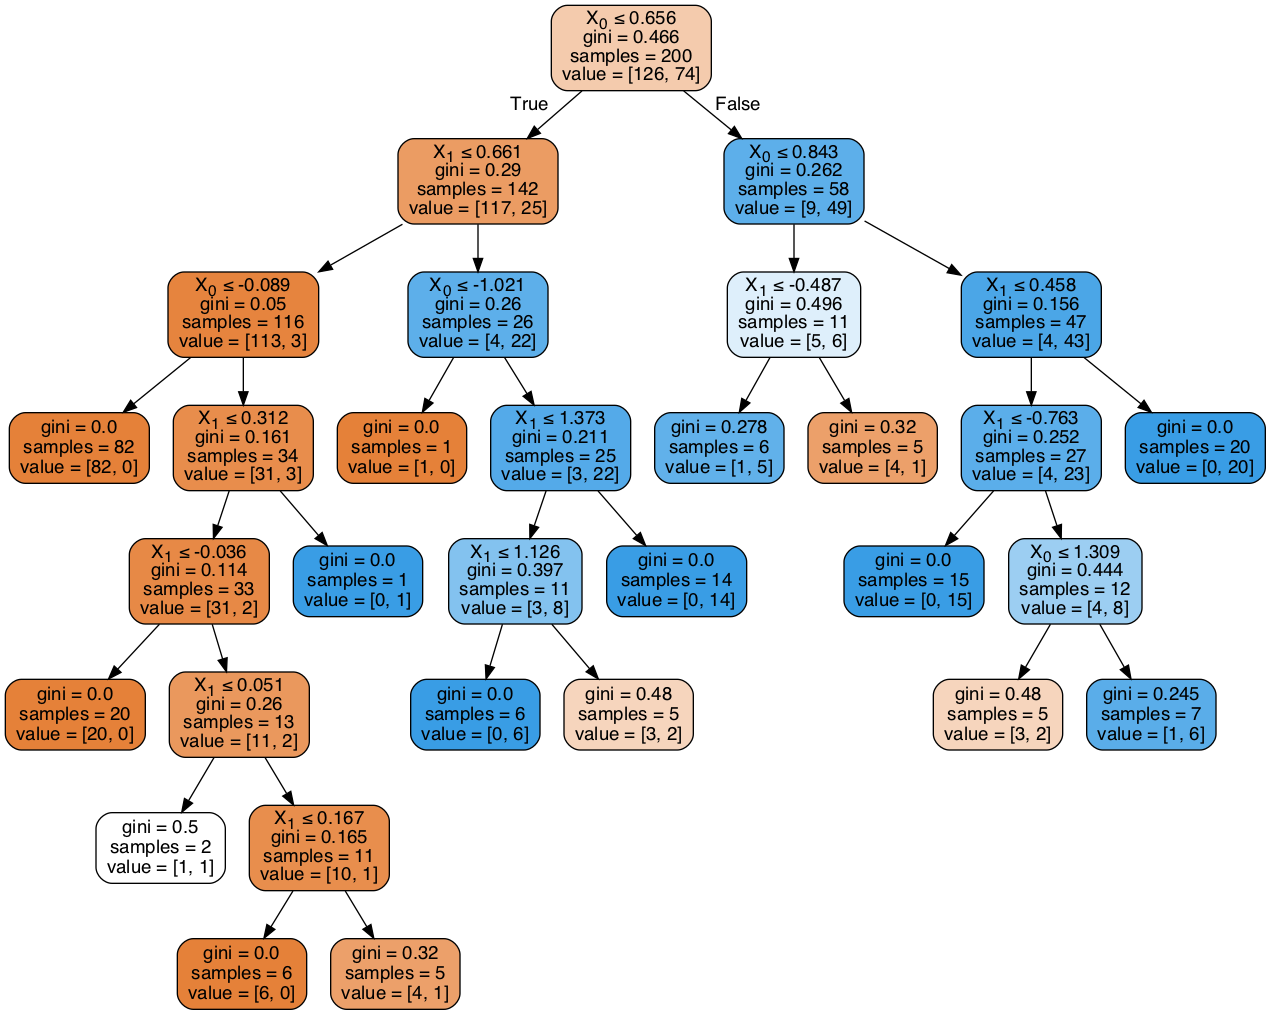

In [232]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [233]:
y_predict=dtree.predict(X_test)

In [234]:
cm = confusion_matrix(y_test, y_predict) 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[120  11]
 [ 12  57]]


In [235]:
print ("Accuracy : ", accuracy_score(y_test, y_predict)) 

Accuracy :  0.885


In [236]:
# Calculate the absolute errors
errors = abs(y_predict - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.12 degrees.


0.9190729062949441


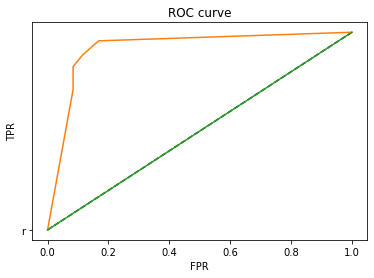

In [241]:

predictions = dtree.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test, predictions))

dfpr, dtpr, thersholds = roc_curve(y_test, predictions)

plt.plot([0,1],[0,1],'k--','r')

plt.plot(dtpr, dtpr,label="dtree")

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## Random Forest ##

In [242]:
from sklearn.ensemble import RandomForestClassifier

In [256]:
rclassifier = RandomForestClassifier(n_estimators = 10, random_state = 42, max_depth = 3) 

In [257]:
rclassifier.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [258]:
y_predict=rclassifier.predict(X_test)

In [259]:
cm = confusion_matrix(y_test, y_predict) 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[131   0]
 [ 69   0]]


In [260]:
print ("Accuracy : ", accuracy_score(y_test, y_predict)) 

Accuracy :  0.655


In [261]:
# Calculate the absolute errors
errors = abs(y_predict - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.34 degrees.


0.5


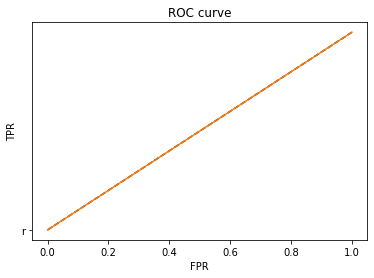

In [264]:

predictions = rclassifier.predict_proba(X_test)[:,1]

print(roc_auc_score(y_test, predictions))

rfpr, rtpr, rthersholds = roc_curve(y_test, predictions)

plt.plot([0,1],[0,1],'k--','r')

plt.plot(rfpr, rtpr)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

!conda install pydotplus --y

!conda install graphviz --y